In [30]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)
library(randomForest)
library(cluster)
library(factoextra)
library(NbClust)

## Load data

In [3]:
spe <- read_delim("MQU_spe.txt", delim = "\t")
env <- read_delim("MQU_env.txt", delim = "\t")
traits <- read_delim("MQU_traits.txt", delim = "\t")
loc <- loc <- read_delim("MQU_loc.txt", delim = "\t")

New names:
• `` -> `...1`
Rows: 9 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): ...1
dbl (89): Acer palmatum var. pubescens, Acer serrulatum, Ardisia quinquegona...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Locality code
dbl (2): Elevation, pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 89 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Species
dbl (5): SLA, LDMC, LT, LA, SSD

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types =

In [4]:
# modify name of location by site
spe <- spe %>% 
  rename(site = `...1`)

env <- env %>%
  rename(site = `Locality code`)

loc <- loc %>%
  rename(site = `Locality code`)

## Clustering

### Distance matrix

          M01       M02       M03       Q01       Q02       Q03       U01
M02 1.2217848                                                            
M03 0.8375617 1.2690128                                                  
Q01 1.2536300 1.3944600 1.3654448                                        
Q02 1.2781406 1.3339139 1.3404112 1.1269296                              
Q03 1.3028390 1.2945328 1.3060528 1.3238517 1.0427409                    
U01 1.3650200 1.3998677 1.3931773 1.3934027 1.1458584 0.8737859          
U02 1.4142136 1.4137391 1.4142136 1.3780734 1.3678148 1.4026732 1.1279569
U03 1.4142136 1.4140476 1.4141070 1.4081217 1.3893560 1.4098913 1.3505826
          U02
M02          
M03          
Q01          
Q02          
Q03          
U01          
U02          
U03 1.3369047

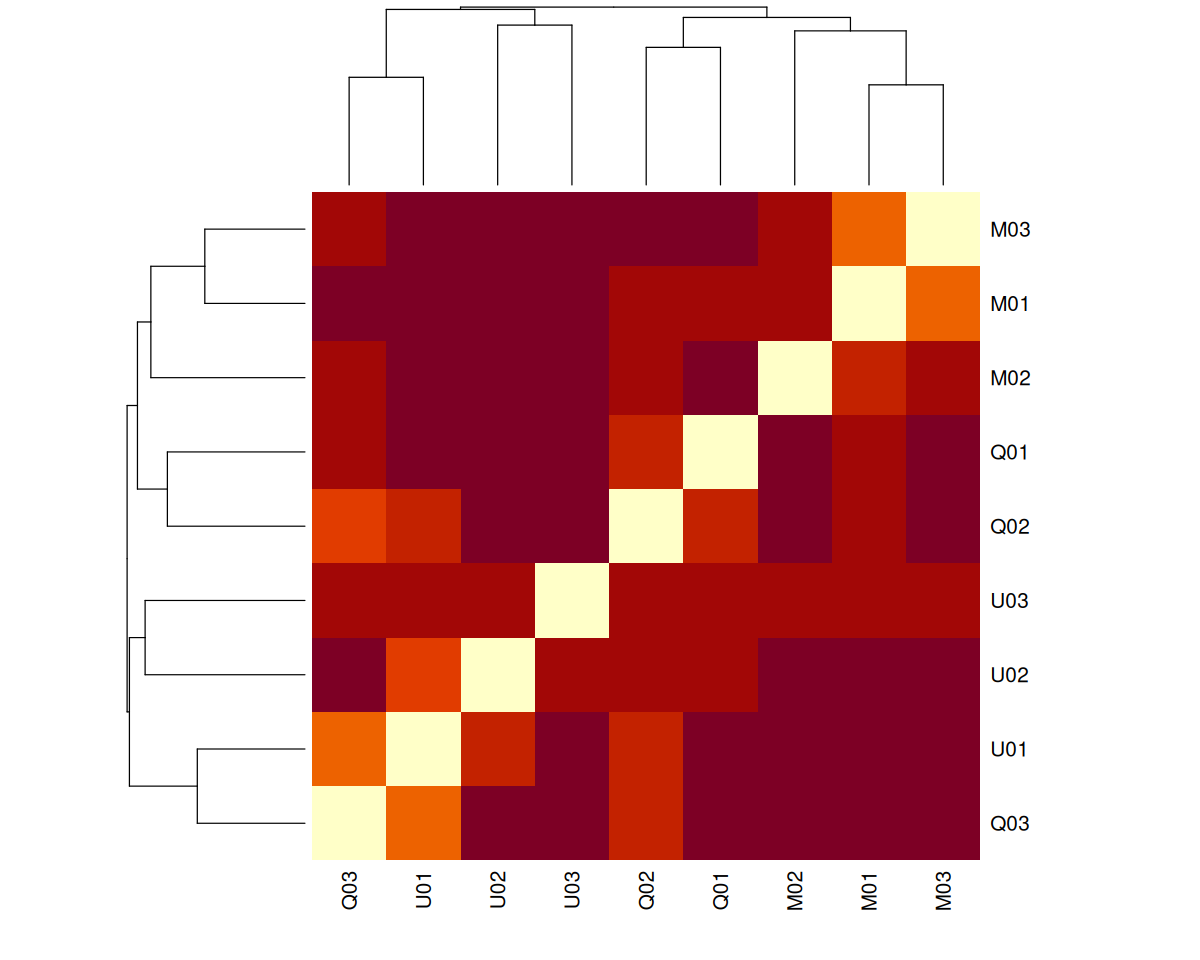

In [8]:
spe_mat <- spe %>%
  column_to_rownames("site")

#normalize abundance
spe_norm <- decostand(spe_mat, method = "normalize")

#Chord distance matrix
spe_dist <- vegdist(spe_norm, method = "euclidean")
spe_dist

#Heatmap distance matrix
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe_dist))

### Single linkage

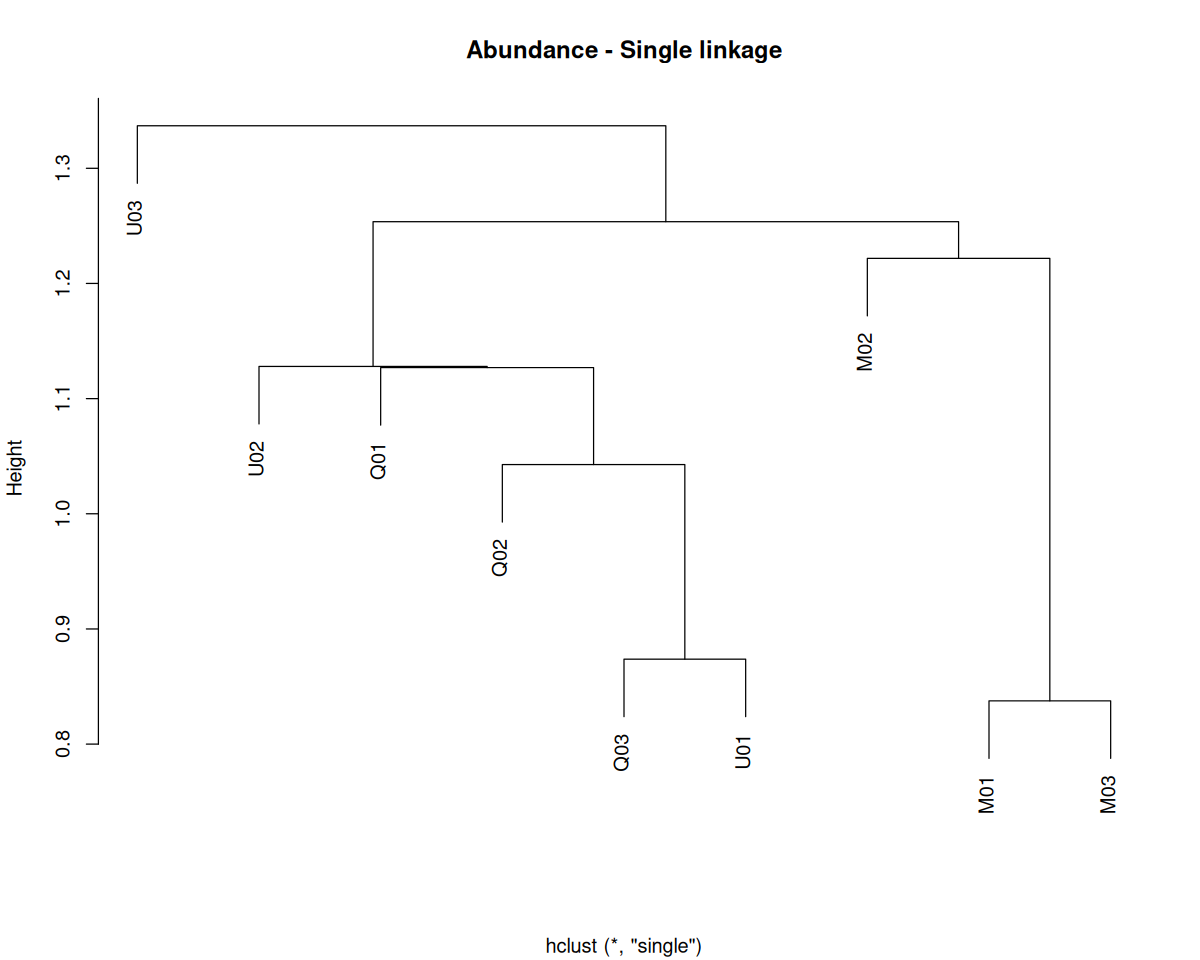

In [28]:
#Hierarchical clustering
spe.single <- hclust(spe_dist, method = "single")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe.single, main = "Abundance - Single linkage", xlab = "")

In [25]:
#cophenetic distance
spe.single.coph <- cophenetic(spe.single)
cor(spe_dist, spe.single.coph)

[1] 0.8264814

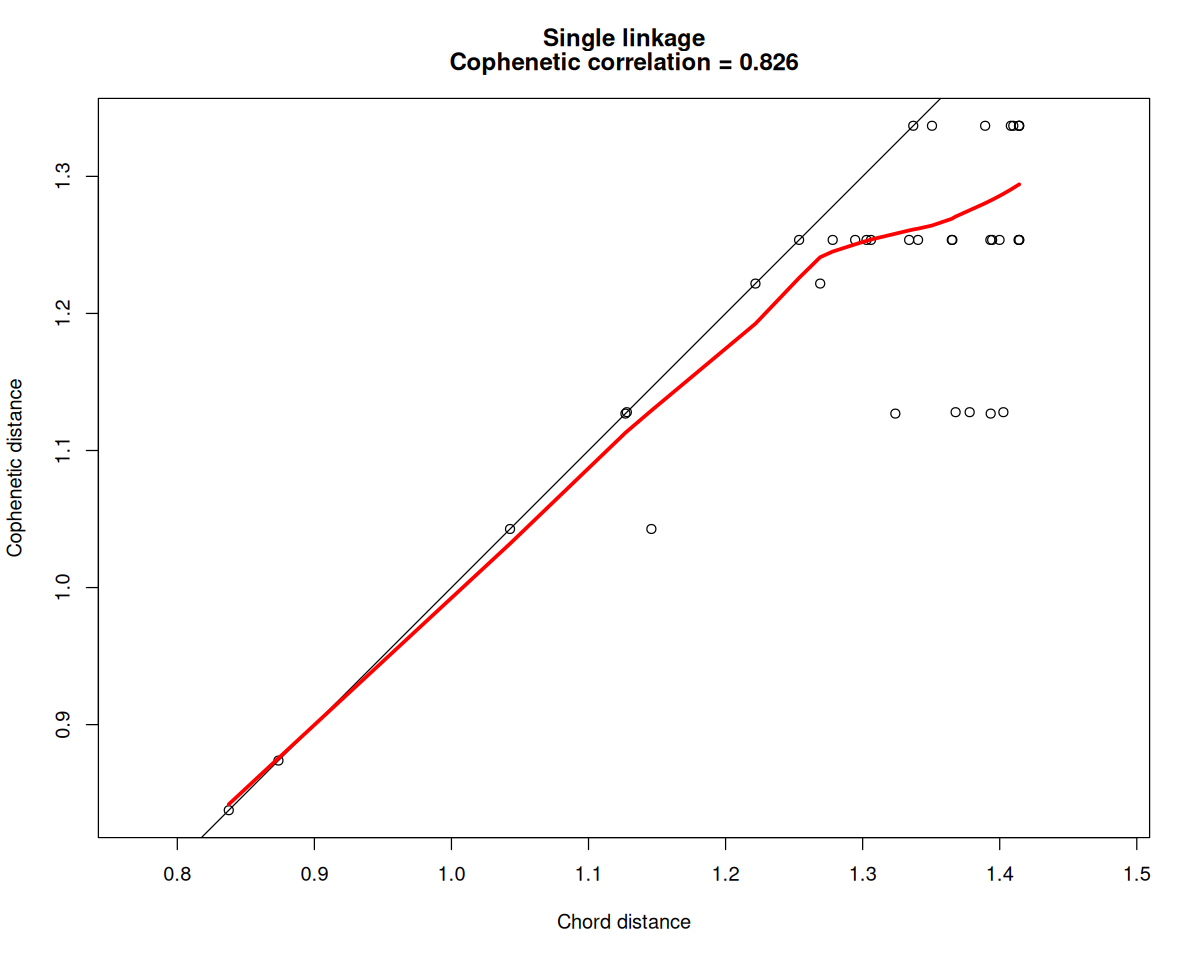

In [26]:
#Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.single.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Single linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.single.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.single.coph), col = "red", lwd = 3)

### Complete linkage

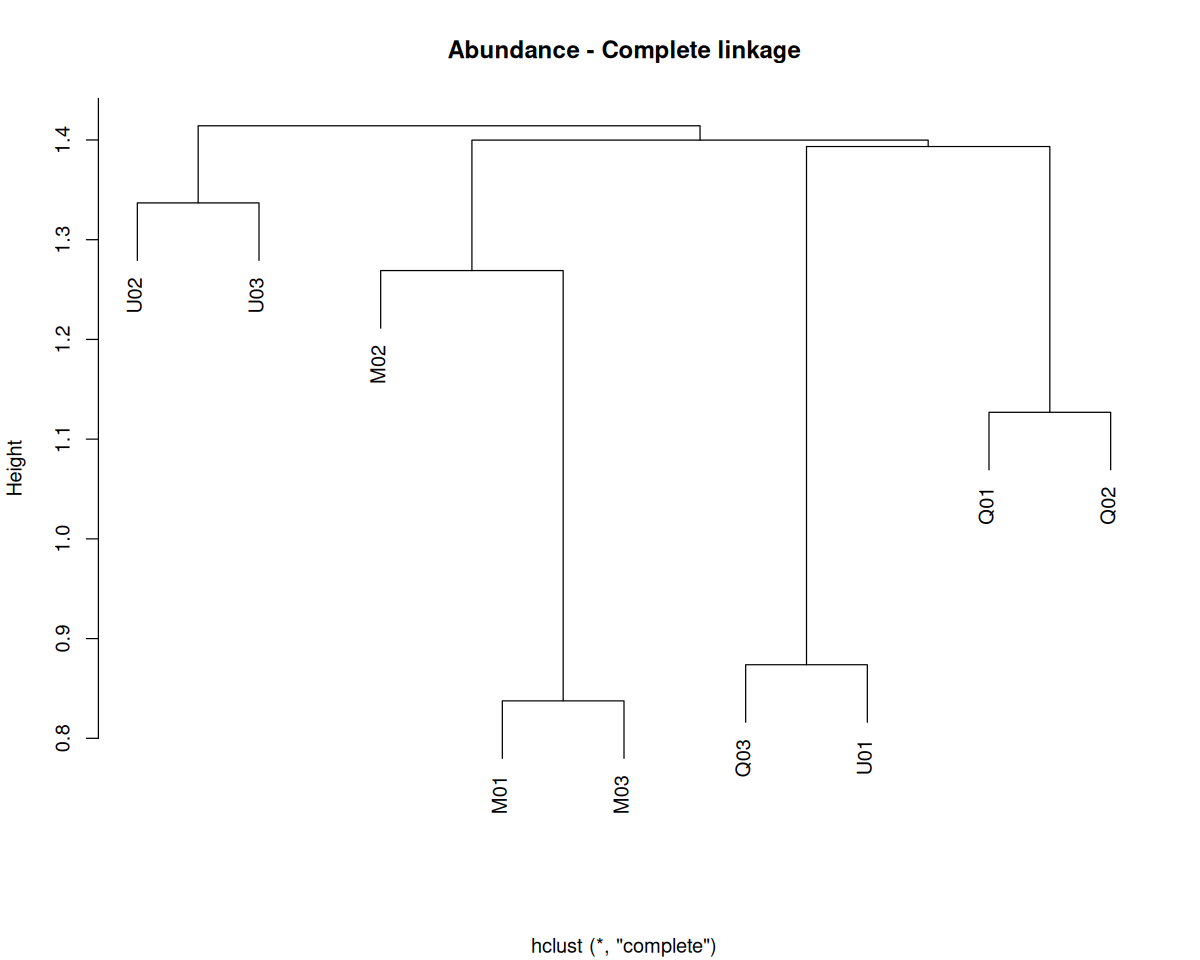

In [12]:
#Hierarchical clustering
spe.complete <- hclust(spe_dist, method = "complete")
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe.complete, main = "Abundance - Complete linkage", xlab = "")

In [13]:
#Cophenetic distance
spe.comp.coph <- cophenetic(spe.complete)
cor(spe_dist, spe.comp.coph)

[1] 0.8209811

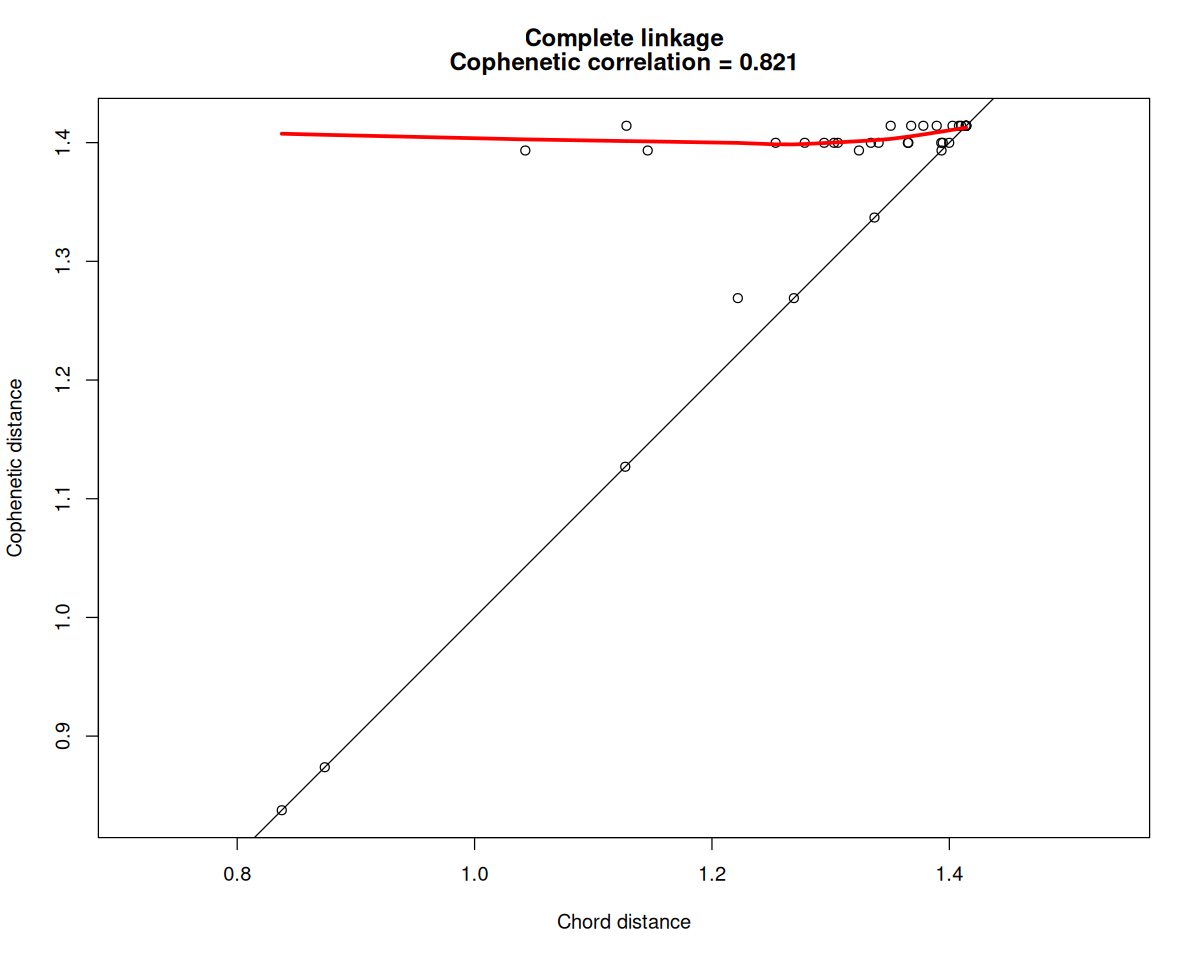

In [14]:
#Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.comp.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Complete linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.comp.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.comp.coph), col = "red", lwd = 3)


### Centroid

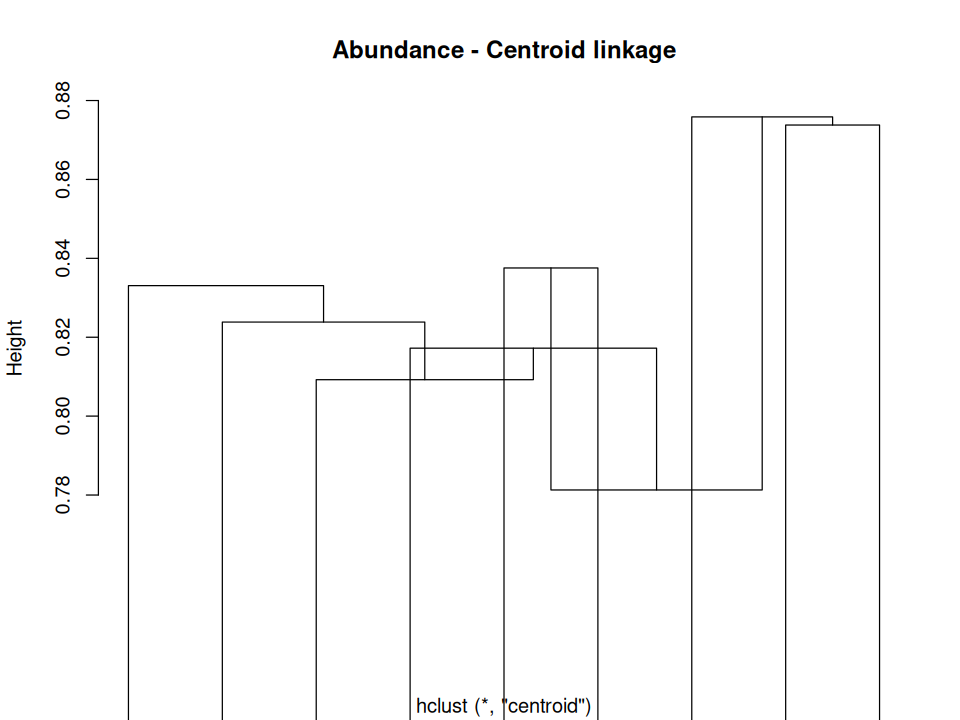

In [20]:
#Hierarchical clustering
spe.centroid <- hclust(spe_dist, method = "centroid")
options(repr.plot.width = 8, repr.plot.height =6)
plot(spe.centroid, main = "Abundance - Centroid linkage", xlab = "")

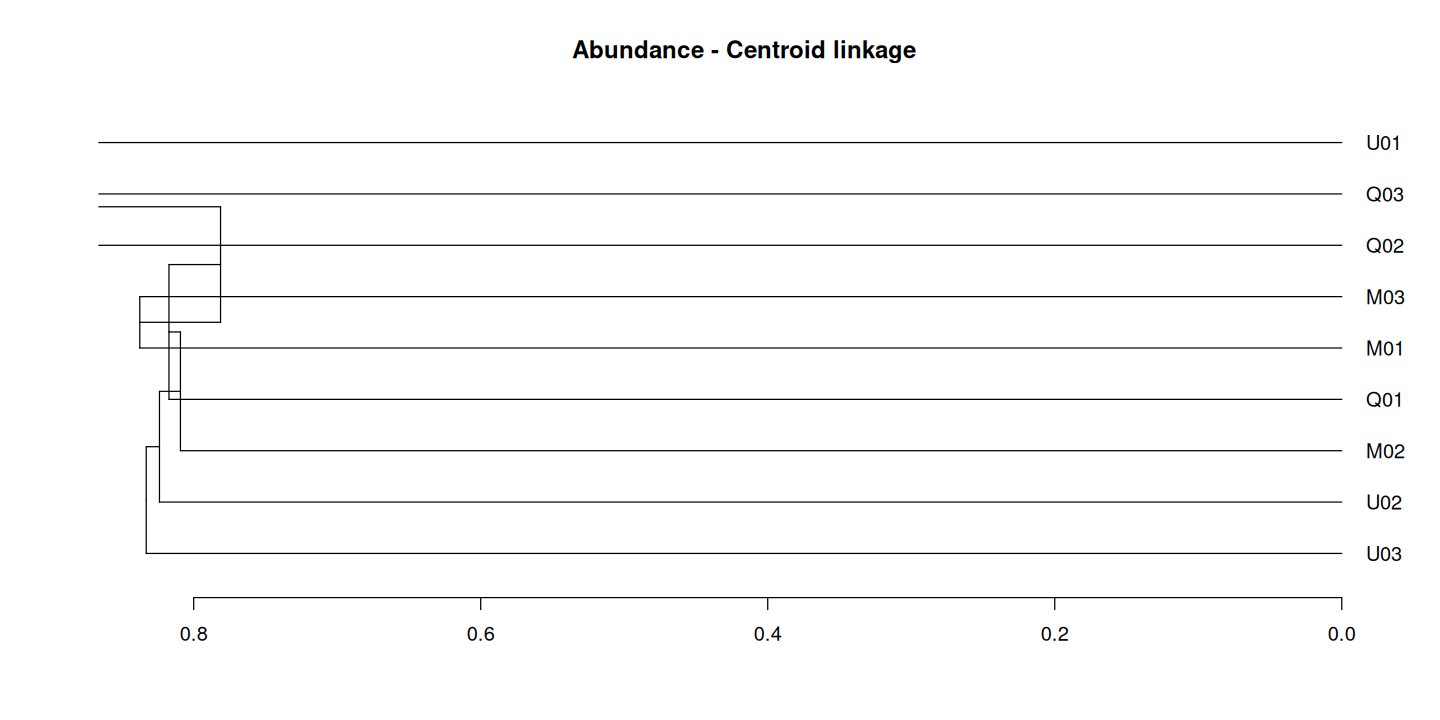

In [39]:
plot(as.dendrogram(spe.centroid), main = "Abundance - Centroid linkage", horiz = TRUE)


In [21]:
#Cophenetic distance
spe.centroid.coph <- cophenetic(spe.centroid)
cor(spe_dist, spe.centroid.coph)

[1] -0.4141534

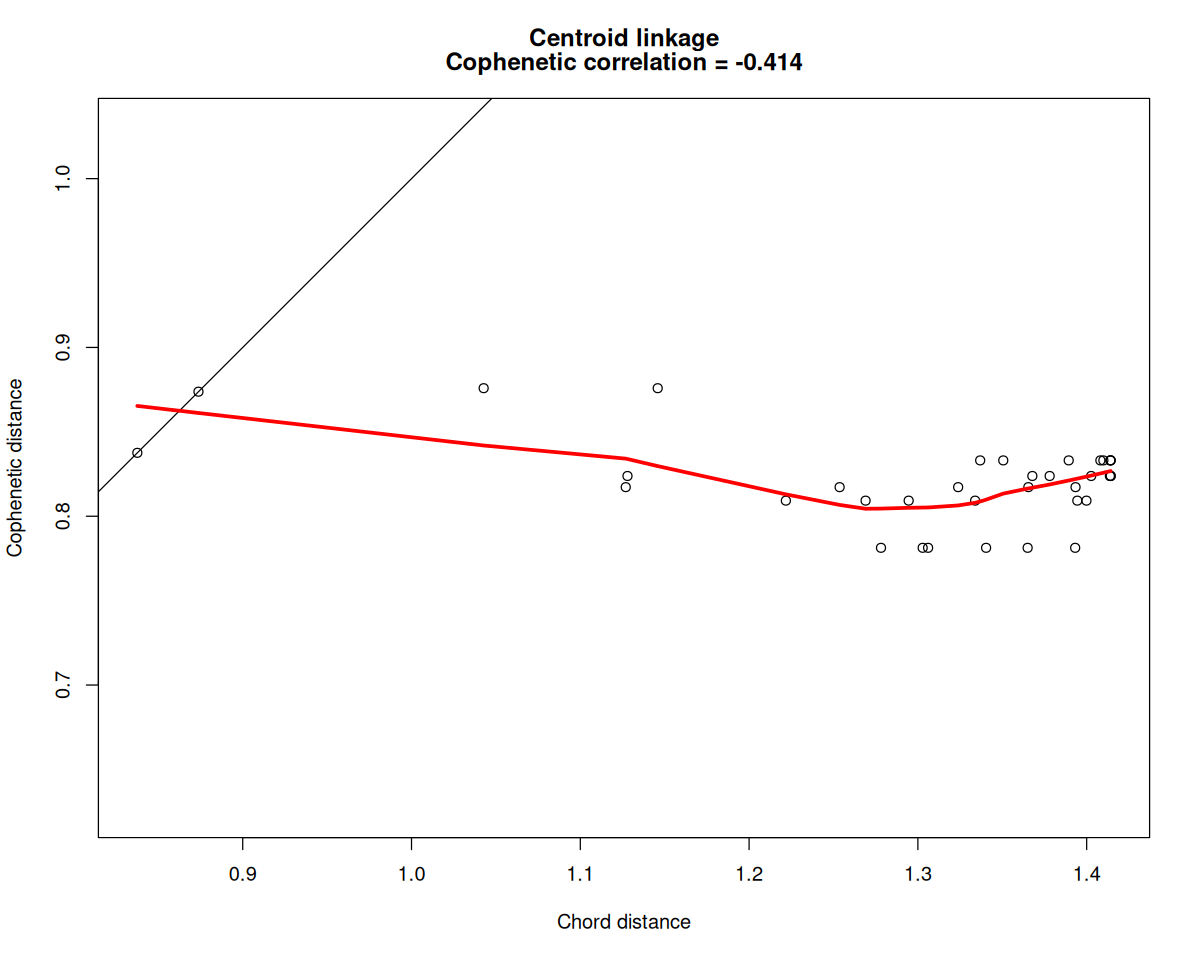

In [22]:
# Shepard diagram
options(repr.plot.width = 10, repr.plot.height = 8)
plot(spe_dist, spe.centroid.coph,
     xlab = "Chord distance",
     ylab = "Cophenetic distance",
     asp = 1,
     main = c("Centroid linkage",
              paste("Cophenetic correlation =",
                    round(cor(spe_dist, spe.centroid.coph), 3))))
abline(0, 1)
lines(lowess(spe_dist, spe.centroid.coph), col = "red", lwd = 3)